# Welcome to Machine Learning - Week 4
Instructor - Daniel Wiesenfeld


**Today's Lecture:**
- Decision Trees
- Bagging & Random Forests
- Boosting & Gradient Boosted Trees
- Hyperparameter Tuning
- Model Evaluation Metrics

### 1. Introduction to Decision Trees
- Definition and Purpose
- How Decision Trees Work
- Key Concepts: Entropy, Information Gain, Gini Impurity


#### Definition and Purpose
A decision tree is a supervised learning algorithm used for both classification and regression tasks. It models decisions and their possible consequences as a tree-like structure. The main purpose of a decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

#### How Decision Trees Work
1. **Root Node**: Represents the entire dataset, which is then split into subsets.
2. **Splitting**: Process of dividing a node into two or more sub-nodes.
3. **Decision Node**: When a sub-node splits into further sub-nodes.
4. **Leaf/Terminal Node**: Nodes that do not split.
5. **Pruning**: Removing sub-nodes of a decision node; opposite of splitting.
6. **Branch/Sub-tree**: A subsection of the entire tree.
7. **Parent and Child Node**: A node that is divided into sub-nodes is the parent node, and the sub-nodes are child nodes.

The tree is constructed by splitting the dataset into subsets based on the attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning.

#### Key Concepts
1. **Entropy**: A measure of the amount of uncertainty or impurity in the dataset.

$$Entropy(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)$$
where \(S\) is the dataset, \(c\) is the number of classes, and \(p_i\) is the probability of class \(i\).

2. **Information Gain**: The reduction in entropy after a dataset is split on an attribute.

$$Information Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Entropy(S_v)$$
where \(A\) is an attribute, \(Values(A)\) are the possible values of attribute \(A\), and \(S_v\) is the subset of \(S\) for which attribute \(A\) has value \(v\).

3. **Gini Impurity**: Another measure of impurity or impurity used by the CART algorithm for classification trees.

$$Gini(S) = 1 - \sum_{i=1}^{c} p_i^2$$
where \(S\) is the dataset, \(c\) is the number of classes, and \(p_i\) is the probability of class \(i\).

### Example: Decision Tree for Classification


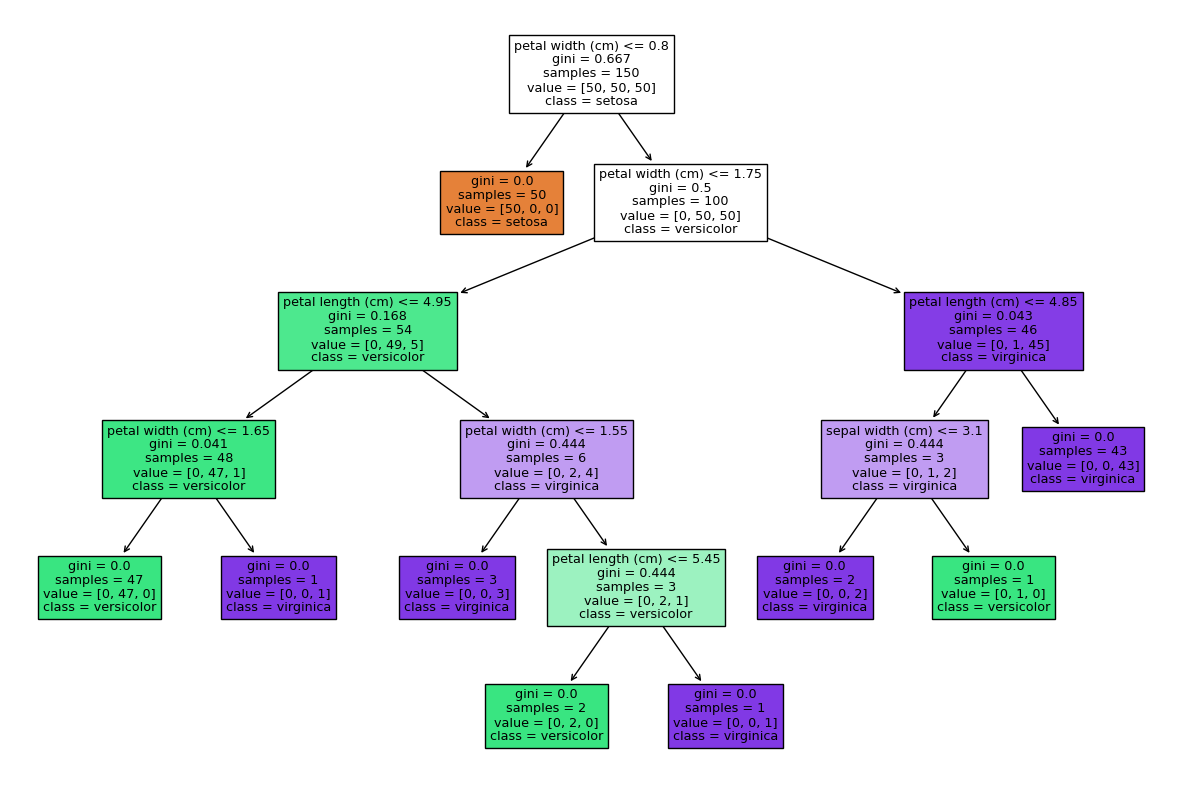

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

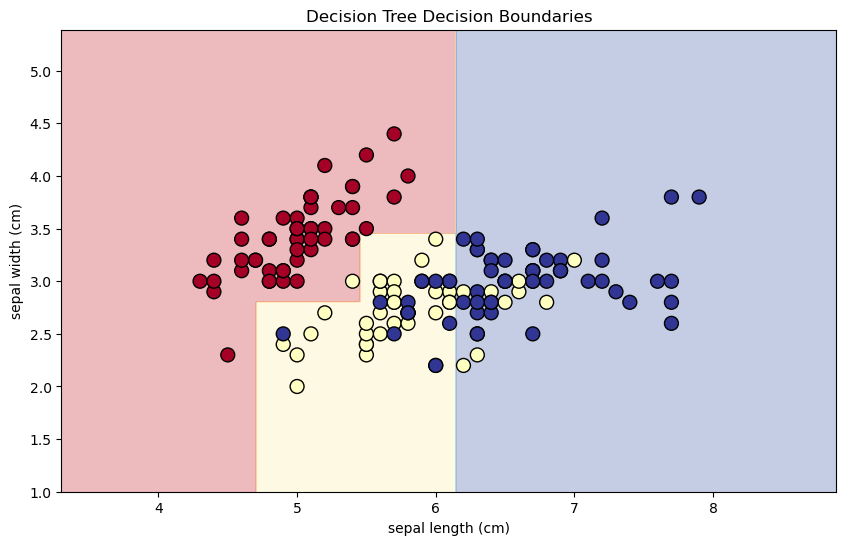

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # Only use the first two features for easy visualization
y = iris.target

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X, y)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict classes for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.RdYlBu)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Decision Tree Decision Boundaries')
plt.show()

### Reduction in Variance for Regression Trees,
In regression trees, the concept analogous to information gain in classification trees is the reduction in variance.

#### Step 1: Calculate Variance of the Parent Node
The variance of the target variable $y$ in the parent node is calculated as follows:

$$\text{Var}(y) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \overline{y})^2$$

where $N$ is the number of data points in the parent node, $y_i$ is the target value of the $i$-th data point, and $\overline{y} $ is the mean of the target values in the parent node.

#### Step 2: Calculate Variance of the Child Nodes
After splitting the data on a feature, compute the variance of the target variable in each child node:

$$\text{Var}(y_{\text{left}}) = \frac{1}{N_{\text{left}}} \sum_{i \in \text{left}} (y_i - \overline{y}_{\text{left}})^2$$


$$\text{Var}(y_{\text{right}}) = \frac{1}{N_{\text{right}}} \sum_{i \\in \text{right}} (y_i - \overline{y}_{\text{right}})^2$$

where $N_{\text{left}} $ and $ N_{\text{right}} $ are the number of data points in the left and right child nodes, respectively. $ \overline{y}_{\text{left}} $ and $ \overline{y}_{\text{right}}$ are the means of the target values in the left and right child nodes.  

#### Step 3: Calculate the Weighted Average Variance of the Child Nodes
Compute the weighted average variance of the child nodes:
$$\text{Var}_{\text{children}} = \frac{N_{\text{left}}}{N} \text{Var}(y_{\text{left}}) + \frac{N_{\text{right}}}{N} \text{Var}(y_{\text{right}})$$

#### Step 4: Compute the Reduction in Variance
The reduction in variance, which is analogous to information gain, is given by:
$$\text{Reduction in Variance} = \text{Var}(y) - \text{Var}_{\text{children}}$$  

### Example Code: Computing Reduction in Variance
Here's a Python code snippet that demonstrates how to compute the reduction in variance for a regression tree split.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Sample data
X = np.array([[2.3], [4.4], [5.1], [6.8], [8.0]])
y = np.array([3.0, 4.0, 4.5, 6.0, 8.0])

# Function to compute variance
def variance(y):
    return np.var(y) * len(y)

# Split the data
left_indices = np.where(X <= 5.0)[0]
right_indices = np.where(X > 5.0)[0]

y_left = y[left_indices]
y_right = y[right_indices]

# Compute variances
var_parent = variance(y)
var_left = variance(y_left)
var_right = variance(y_right)

# Compute weighted average variance of children
N = len(y)
N_left = len(y_left)
N_right = len(y_right)
var_children = (N_left / N) * var_left + (N_right / N) * var_right

# Compute reduction in variance
reduction_in_variance = var_parent - var_children

print(f"Reduction in Variance: {reduction_in_variance:.4f}")

### 2. Bagging
- Definition and Purpose
- How Bagging Works
- Benefits of Bagging


#### Definition and Purpose
Bagging, short for Bootstrap Aggregating, is an ensemble method designed to improve the stability and accuracy of machine learning algorithms. It reduces variance and helps to avoid overfitting. Bagging is mainly used with decision tree-based algorithms but can be applied to other models as well.

#### How Bagging Works
1. **Bootstrap Sampling**: Randomly sample the dataset with replacement to create multiple subsets (bootstrap samples).
2. **Training**: Train a base learner (e.g., decision tree) on each bootstrap sample independently.
3. **Aggregation**: For classification, aggregate the predictions by majority voting. For regression, average the predictions.

This process helps in creating diverse models which, when aggregated, reduce the overall variance of the model.

#### Benefits of Bagging
- **Variance Reduction**: By averaging the predictions, bagging reduces the variance of the model.
- **Improved Stability**: Bagging improves the stability of the model by making it less sensitive to noise in the training data.
- **Better Performance**: It often leads to better performance compared to a single model, especially in terms of generalization on unseen data.


### Example: Bagging with Decision Trees


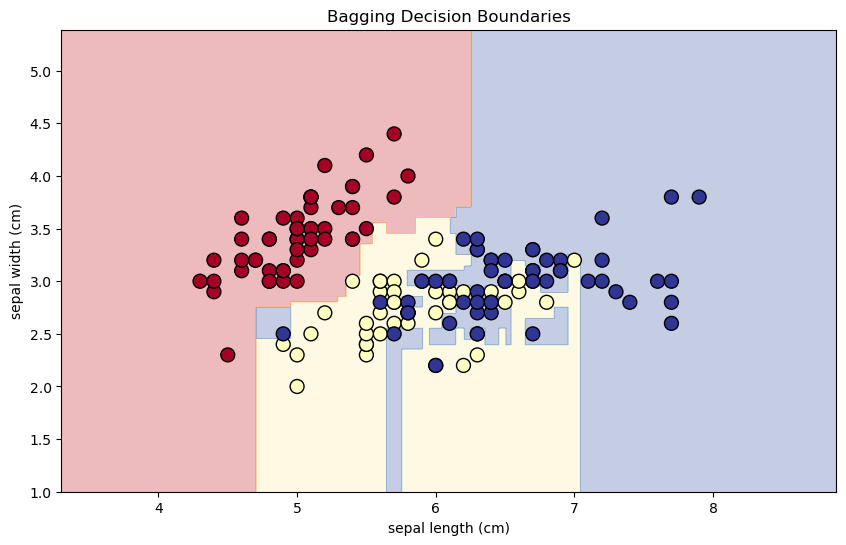

In [18]:
from sklearn.ensemble import BaggingClassifier

# Train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=0)
bagging_clf.fit(X, y)

# Plot decision boundaries for Bagging
Z = bagging_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.RdYlBu)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Bagging Decision Boundaries')
plt.show()

### 3. Random Forests
- Definition and Purpose
- How Random Forests Work
- Advantages over Single Decision Trees


#### Definition and Purpose
A Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. It enhances predictive accuracy and controls overfitting.

#### How Random Forests Work
1. **Bootstrap Sampling**: Similar to Bagging, multiple subsets of the original data are created by sampling with replacement.
2. **Random Feature Selection**: For each split in the decision tree, a random subset of features is selected, adding randomness to the model.
3. **Tree Construction**: Decision trees are constructed on different bootstrap samples, using random subsets of features.
4. **Aggregation**: Predictions are aggregated by majority vote in classification or averaging in regression.

#### Advantages over Single Decision Trees
- **Higher Accuracy**: Random forests generally provide more accurate predictions compared to single decision trees.
- **Reduced Overfitting**: The ensemble approach reduces overfitting by averaging multiple models.
- **Feature Importance**: Random forests can be used to rank the importance of variables in a regression or classification task.
- **Robustness**: They are robust to noise and less sensitive to data fluctuations.

### Example: Random Forest


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X, y)

# Evaluate
rf_clf.score(X, y)

0.9266666666666666

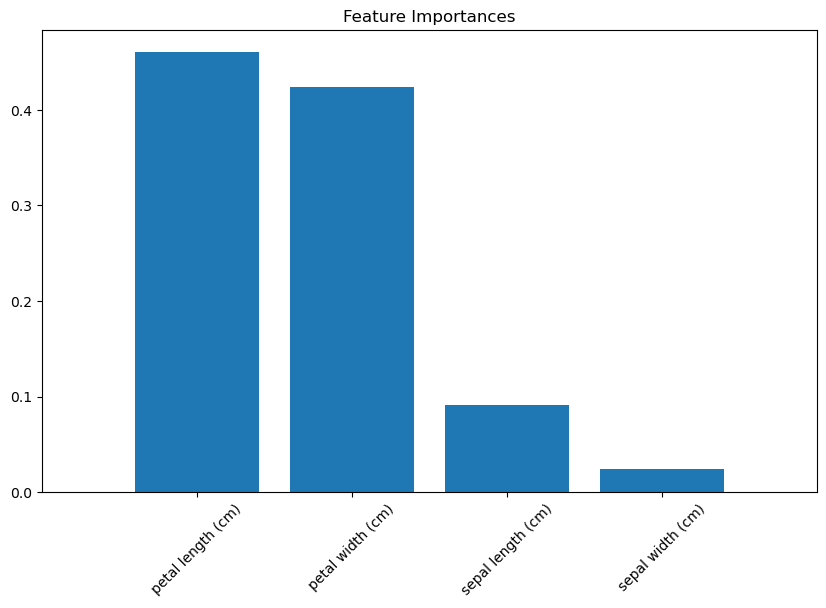

In [20]:
# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(iris.data, iris.target)

# Plot feature importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = iris.feature_names

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.xlim([-1, len(features)])
plt.show()

### 4. Boosting
- Definition and Purpose
- How Boosting Works
- Different Types of Boosting


#### Definition and Purpose
Boosting is an ensemble technique that combines the predictions from several base estimators to improve robustness over a single estimator. It focuses on converting weak learners into strong learners by sequentially training models, each correcting the errors of its predecessor.

#### How Boosting Works
1. **Initialize Weights**: Initialize weights for all training samples.
2. **Train Weak Learner**: Train a weak learner on the weighted dataset.
3. **Update Weights**: Increase the weights of misclassified samples so that the next learner focuses more on them.
4. **Combine Learners**: Combine the learners by weighted majority vote (classification) or weighted sum (regression).

This iterative process continues, with each subsequent model trying to correct the errors of the previous ones.

#### Different Types of Boosting
- **AdaBoost (Adaptive Boosting)**: Adjusts the weights of incorrectly classified samples more aggressively.
- **Gradient Boosting**: Builds new models to predict the residuals/errors of previous models and combines them.
- **XGBoost**: An optimized implementation of gradient boosting with additional features and speed improvements.

### Example: Boosting with Decision Trees


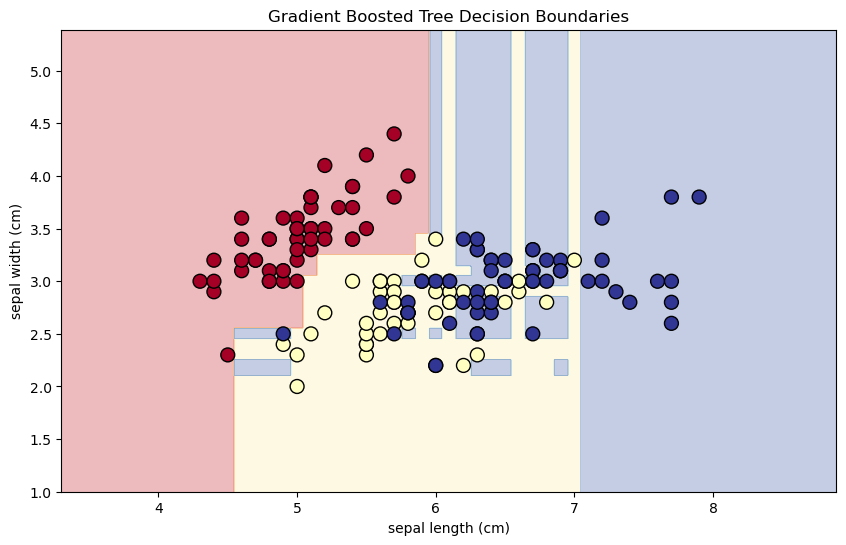

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

X = iris.data[:, :2]  # Only use the first two features for easy visualization
y = iris.target

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb_clf.fit(X, y)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict classes for each point in the mesh grid
Z = gb_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.RdYlBu)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Gradient Boosted Tree Decision Boundaries')
plt.show()

### 5. Gradient Boosted Trees
- Definition and Purpose
- How Gradient Boosted Trees Work
- Advantages and Disadvantages


#### Definition and Purpose
Gradient Boosted Trees (GBT) is a machine learning technique for regression and classification problems. It builds models in a stage-wise fashion and generalizes them by allowing optimization of an arbitrary differentiable loss function.

#### How Gradient Boosted Trees Work
1. **Initialize Model**: Start with a base model, typically a simple one like the mean of the target values.
2. **Compute Residuals**: Calculate the residuals/errors of the model predictions.
3. **Train Weak Learner**: Train a new model to predict these residuals.
4. **Update Model**: Add the new model to the ensemble to update the overall model predictions.
5. **Repeat**: Iterate the process, adding new models to correct the residuals/errors of the combined model.

The final model is a weighted sum of all weak learners.

#### Advantages and Disadvantages
##### Advantages
- **High Accuracy**: Often achieves high predictive performance.
- **Flexibility**: Can optimize a variety of loss functions and provides several hyperparameter tuning options.
- **Feature Importance**: Can provide insights into the importance of features in the prediction.

##### Disadvantages
- **Training Time**: Can be computationally expensive and time-consuming.
- **Overfitting**: Prone to overfitting if not properly tuned, especially with many trees.
- **Interpretability**: Models can become complex and harder to interpret compared to simpler models like single decision trees.

### Example: Gradient Boosted Trees


In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_clf.fit(X, y)

# Evaluate
gb_clf.score(X, y)

0.92

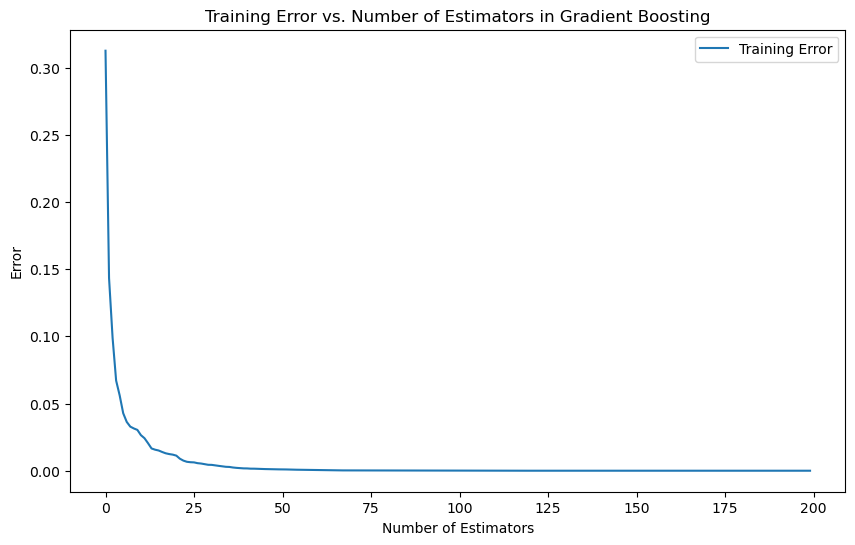

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=0)
gb_clf.fit(X_train, y_train)

# Plot training and testing errors
errors = gb_clf.train_score_
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Training Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.title('Training Error vs. Number of Estimators in Gradient Boosting')
plt.legend()
plt.show()

### 6. Hyperparameter Tuning
- Definition and Purpose
- Common Hyperparameters for Decision Trees and Ensemble Methods
- Techniques for Hyperparameter Tuning: Grid Search, Random Search, etc.


#### Definition and Purpose
Hyperparameter tuning involves optimizing the settings of machine learning algorithms that are not learned from the data. These settings (hyperparameters) influence the training process and the performance of the model. Proper tuning can significantly improve the performance and robustness of the model.

#### Common Hyperparameters for Decision Trees and Ensemble Methods
- **Decision Trees**:
  - `max_depth`: Maximum depth of the tree.
  - `min_samples_split`: Minimum number of samples required to split an internal node.
  - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
  - `max_features`: Number of features to consider when looking for the best split.
- **Random Forests**:
  - `n_estimators`: Number of trees in the forest.
  - `bootstrap`: Whether bootstrap samples are used when building trees.
- **Gradient Boosting**:
  - `learning_rate`: Step size reduction in each iteration.
  - `n_estimators`: Number of boosting stages to be run.
  - `subsample`: Fraction of samples used for fitting the individual base learners.

#### Techniques for Hyperparameter Tuning
- **Grid Search**: Exhaustively searching over a specified parameter grid.
- **Random Search**: Randomly sampling from a parameter grid.
- **Bayesian Optimization**: Sequentially choosing the most promising hyperparameters based on past evaluations. (https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f)

### Example: Hyperparameter Tuning with Grid Search


In [24]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Best parameters
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}

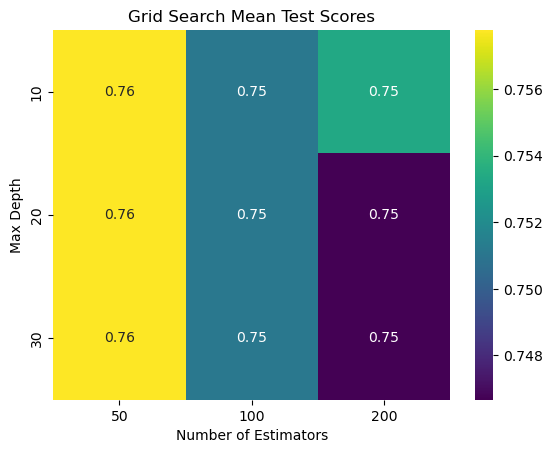

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

# Convert results to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Plot heatmap of mean test scores
pivot_table = results.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_n_estimators')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Grid Search Mean Test Scores')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()

### 7. Model Performance Evaluation Metrics

### Binary Classification

#### Accuracy

Accuracy is the proportion of correctly classified instances among the total number of instances

$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

While accuracy is a useful metric, it may not be the best choice when dealing with imbalanced datasets.


#### Confusion Matrix

A Confusion Matrix is a table used to evaluate the performance of a classification algorithm.

It displays the true positives, true negatives, false positives, and false negatives for each class.

The diagonal elements represent the number of correct predictions for each class, while the off-diagonal elements represent the errors.


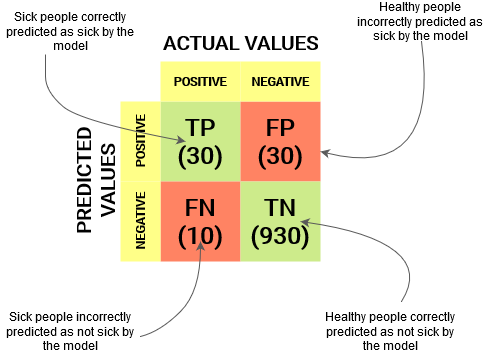

Source: https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/

Also check out: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

#### Precision and Recall
Precision is the proportion of true positive predictions among the total number of positive predictions.

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

Recall is the proportion of true positive predictions among the total number of actual positive instances.

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

Precision and recall are particularly useful when dealing with imbalanced datasets.


#### F1 Score
The F1 score is the harmonic mean of precision and recall.

$$\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

The F1 score is a single metric that balances precision and recall, making it useful for evaluating models on imbalanced datasets.

#### ROC-AUC
ROC-AUC (Receiver Operating Characteristic - Area Under Curve) measures the ability of a classifier to distinguish between classes

The ROC curve is a plot of the true positive rate TPR (same as recall = $\frac{\text{True Positives}}{\text{Actual Positives}}$) against the false positive rate FPR ($\frac{\text{False Positives}}{\text{Actual Negatives}}$)

The curve is drawn by computing TPR and FPR for all possible postive thresholds from 0 to 1.

The AUC (Area Under Curve) value ranges from 0 to 1, with higher values indicating better performance. 

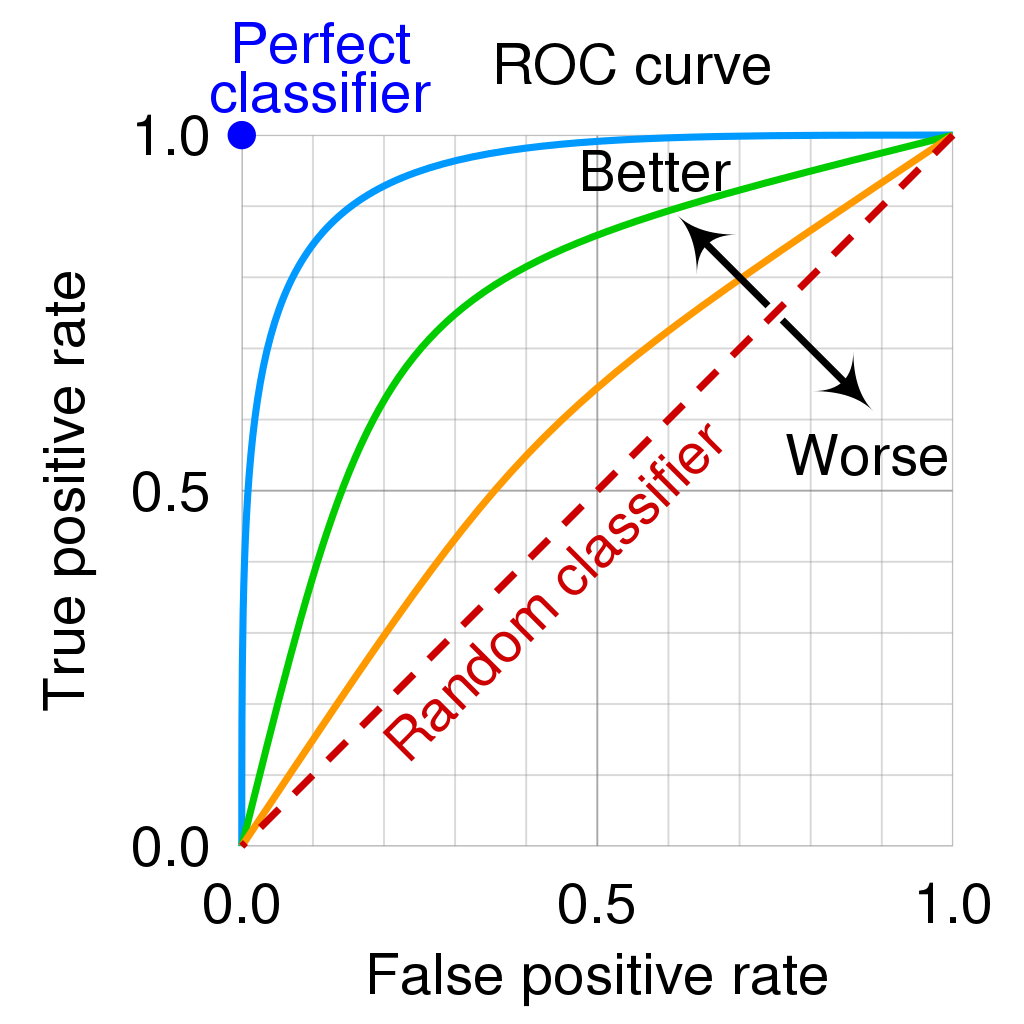
Source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic#/media/File:Roc_curve.svg

### Multiclass Classification
#### Macro-averaged and Micro-averaged Metrics
Macro-averaged Precision, Recall, and F1 Score compute metrics independently for each class and then take the average (treating all classes equally).

$$\text{Macro-averaged Precision} = \frac{1}{C} \sum_{i=1}^{C} \text{Precision}_i$$


Micro-averaged Precision, Recall, and F1 Score aggregate the contributions of all classes to compute the average metric (treating all instances equally).

$$\text{Micro-averaged Precision} = \frac{\sum_{i=1}^{C} \text{TP}_i}{\sum_{i=1}^{C} (\text{TP}_i + \text{FP}_i)}$$


### Regression

#### R-squared
R-squared (Coefficient of Determination) measures the proportion of variance in the dependent variable that is predictable from the independent variables.
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

R-squared values range from 0 to 1, with higher values indicating better model fit.

*Note: When using R-squared on a test or validation set, you should use the $\bar y$ from the training data.*

#### Root Mean Squared Error (RMSE)
RMSE measures the average magnitude of the residuals (errors) between predicted and observed values.

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

RMSE is useful for understanding the model's prediction error in the same units as the dependent variable.

#### Mean Absolute Error (MAE)

MAE measures the average absolute difference between predicted and observed values.

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

MAE is simple to interpret and provides a clear measure of average prediction error.


#### Mean Absolute Percentage Error (MAPE)

MAPE measures the average absolute percentage difference between predicted and observed values.

$$\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100$$

MAPE is useful for understanding the prediction error as a percentage, making it easier to interpret in certain contexts.